### Proyecto T2: Modelamiento de Datos con Regresión Lineal Simple 
### Integrantes

- Javiera Santana Abasolo
- Cristhian Alejandro Solís
- Cristian Alejandro Vásquez Poblete
- César Godoy Delaigue

***Pofresor: Boris Panes - Analisis de Datos - Magister DataSicence UDD***

### Introducción

El acceso al agua potable segura es esencial para la salud, un derecho humano fundamental y un componente de una política eficaz para la protección de la salud. Esto es importante como un problema de salud y desarrollo a nivel nacional, regional y local. En algunas regiones, se ha demostrado que las inversiones en abastecimiento de agua y saneamiento pueden generar un beneficio económico neto, ya que las reducciones en los efectos adversos para la salud y los costos de atención médica superan los costos de realizar las intervenciones.

## 1.- Selección de Datos

Unidades de Medida: 

- ppm: partes por millón
- μg/L: microgramo por litro
- mg/L: miligramo por litro

Para este proyecto, utilizamos el dataset **Water Potability**, que contiene las siguientes columnas:

1. ph: pH del agua (de 0 a 14).
2. Hardness (Dureza): Capacidad del agua para precipitar en Jabón mg/L.
3. Solids (Sólidos): Sólidos totales disueltos en ppm.
4. Chloramines (Cloraminas): Cantidad de Cloraminas en ppm.
5. Sulfate (Sulfatos): Cantidad de Sulfatos disueltos en mg/L.
6. Conductivity (Conductividad): Conductividad eléctrica del agua en μS/cm.
7. Organic_carbon (Carbono_orgánico): Cantidad de carbono orgánico en ppm.
8. Trihalomethanes (Trihalometanos): Cantidad de trihalometanos en μg/L.
9. Turbidity (Turbidez): Medida de la propiedad de emisión de luz del agua en NTU.
10. Potability (Potabilidad): Indica si el agua es segura para el consumo humano. Potable = 1 y No potable = 0

### Planteamiento del problema:

El dataset tiene variables que miden la calidad del agua y su potabilidad para el consumo humano. En este análisis, seleccionaremos dos variables para aplicar una regresión lineal simple.

Predecir el nivel de pH del agua basado en otras características del agua como la temperatura, la concentración de oxígeno disuelto, y la turbidez.

### Detalle de las columnas del conjunto de datos

- **Valor del pH**: El pH es un parámetro importante en la evaluación del equilibrio ácido-base del agua y es indicador del estado ácido o alcalino. La OMS ha recomendado un límite máximo permisible de pH entre 6,5 y 8,5. Los rangos del presente estudio fueron de 6,52 a 6,83, dentro del estándar de la OMS.

- **Dureza**: Causada principalmente por sales de calcio y magnesio, las cuales se disuelven en el agua al pasar por depósitos geológicos. La dureza se define como la capacidad del agua para precipitar jabón, debido al calcio y magnesio.

- **Sólidos (Sólidos totales disueltos - TDS)**: El agua disuelve minerales y sales como potasio, calcio, sodio, entre otros. Los altos niveles de TDS indican una mayor mineralización. El límite deseable es de 500 mg/l, y el máximo es de 1000 mg/l según las normas de agua potable.

- **Cloraminas**: Utilizadas como desinfectantes en sistemas de agua públicos, las cloraminas se forman cuando se añade amoníaco al cloro. Los niveles seguros de cloro en agua potable son de hasta 4 mg/L o 4 ppm.

- **Sulfatos**: Se encuentran en minerales y suelos. Las concentraciones de sulfato en el agua dulce oscilan entre 3 y 30 mg/L, aunque en algunas zonas pueden llegar hasta 1000 mg/L.

- **Conductividad**: El agua pura es un mal conductor de electricidad. La conductividad eléctrica depende de la concentración de iones en el agua. Según las normas de la OMS, no debe superar los 400 μS/cm.

- **Carbono Orgánico**: El carbono orgánico total (COT) proviene de la materia orgánica en descomposición o de fuentes sintéticas. Según la US EPA, los niveles recomendados son < 2 mg/L en agua potable y < 4 mg/L en agua de origen.

- **Trihalometanos (THM)**: Son productos químicos que se forman en el agua tratada con cloro. Los niveles seguros de THM son hasta 80 ppm en el agua potable.

- **Turbidez**: Depende de la cantidad de materia sólida suspendida en el agua. El valor de turbidez del Campus Wondo Genet (0,98 NTU) está por debajo del valor máximo recomendado por la OMS, que es 5,00 NTU.

- **Potabilidad**: Indica si el agua es segura para el consumo humano, donde 1 significa Potable y 0 significa No potable.


# 2.- Exploración y Limpieza de Datos

## 2.1 Importación de las librerías

In [7]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt 
import seaborn as sns
#Import ploting libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

## 2.2 Carga y exploración inical de Datos

In [8]:
# Load the dataset
file_path = ("..\Data\water_potability.csv")
df_water_Quality = pd.read_csv(file_path)

print(df_water_Quality.head())

         ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0  


In [9]:
df_water_Quality.shape

(3276, 10)

In [11]:
df_water_Quality.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [12]:
df_water_Quality.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


Excepto la característica Target, las otras características son float y valores continuos.

In [13]:
##crear límite de aprobación para cada característica en función de los datos disponibles en la búsqueda de Google
cols=df_water_Quality.columns[0:9].to_list()
min_val=[6.52,0,500,0,3,0,0,0,0]
max_val=[6.83,0,1000,4,250,400,2,80,5]
limit=pd.DataFrame(data=[min_val, max_val], columns=cols)

In [14]:
df_water_Quality.describe().T.style.background_gradient(subset=['mean','std','50%','count'], cmap='PuBu')

,count,mean,std,min,25%,50%,75%,max
ph,2785.000000,7.080795,1.594320,0.000000,6.093092,7.036752,8.062066,14.000000
Hardness,3276.000000,196.369496,32.879761,47.432000,176.850538,196.967627,216.667456,323.124000
Solids,3276.000000,22014.092526,8768.570828,320.942611,15666.690297,20927.833607,27332.762127,61227.196008
Chloramines,3276.000000,7.122277,1.583085,0.352000,6.127421,7.130299,8.114887,13.127000
Sulfate,2495.000000,333.775777,41.416840,129.000000,307.699498,333.073546,359.950170,481.030642
Conductivity,3276.000000,426.205111,80.824064,181.483754,365.734414,421.884968,481.792304,753.342620
Organic_carbon,3276.000000,14.284970,3.308162,2.200000,12.065801,14.218338,16.557652,28.300000
Trihalomethanes,3114.000000,66.396293,16.175008,0.738000,55.844536,66.622485,77.337473,124.000000
Turbidity,3276.000000,3.966786,0.780382,1.450000,3.439711,3.955028,4.500320,6.739000
Potability,3276.000000,0.390110,0.487849,0.000000,0.000000,0.000000,1.000000,1.000000


A partir de la tabla anterior, podemos ver que el recuento de cada característica no es el mismo, por lo que debe haber algunos valores nulos. La característica Sólidos tiene la media y la desviación estándar más altas en comparación con otras características, por lo que la distribución debe ser alta. Sin embargo, la descripción anterior es para la población total. Intentemos lo mismo para 2 muestras basadas en la característica Potabilidad

In [15]:
# Si el agua es 1 - significa que el agua es potable para Humanos
df_water_Quality[df_water_Quality['Potability']==1].describe().T.style.background_gradient(subset=['mean','std','50%','count'], cmap='PuBu')

,count,mean,std,min,25%,50%,75%,max
ph,1101.000000,7.073783,1.448048,0.227499,6.179312,7.036752,7.933068,13.175402
Hardness,1278.000000,195.800744,35.547041,47.432000,174.330531,196.632907,218.003420,323.124000
Solids,1278.000000,22383.991018,9101.010208,728.750830,15668.985035,21199.386614,27973.236446,56488.672413
Chloramines,1278.000000,7.169338,1.702988,0.352000,6.094134,7.215163,8.199261,13.127000
Sulfate,985.000000,332.566990,47.692818,129.000000,300.763772,331.838167,365.941346,481.030642
Conductivity,1278.000000,425.383800,82.048446,201.619737,360.939023,420.712729,484.155911,695.369528
Organic_carbon,1278.000000,14.160893,3.263907,2.200000,12.033897,14.162809,16.356245,23.604298
Trihalomethanes,1223.000000,66.539684,16.327419,8.175876,56.014249,66.678214,77.380975,124.000000
Turbidity,1278.000000,3.968328,0.780842,1.492207,3.430909,3.958576,4.509569,6.494249
Potability,1278.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [16]:
# # Si el agua es 0 - significa que el agua NO es potable para Humanos
df_water_Quality[df_water_Quality['Potability']==0].describe().T.style.background_gradient(subset=['mean','std','50%','count'], cmap='RdBu')

,count,mean,std,min,25%,50%,75%,max
ph,1684.000000,7.085378,1.683499,0.000000,6.037723,7.035456,8.155510,14.000000
Hardness,1998.000000,196.733292,31.057540,98.452931,177.823265,197.123423,216.120687,304.235912
Solids,1998.000000,21777.490788,8543.068788,320.942611,15663.057382,20809.618280,27006.249009,61227.196008
Chloramines,1998.000000,7.092175,1.501045,1.683993,6.155640,7.090334,8.066462,12.653362
Sulfate,1510.000000,334.564290,36.745549,203.444521,311.264006,333.389426,356.853897,460.107069
Conductivity,1998.000000,426.730454,80.047317,181.483754,368.498530,422.229331,480.677198,753.342620
Organic_carbon,1998.000000,14.364335,3.334554,4.371899,12.101057,14.293508,16.649485,28.300000
Trihalomethanes,1891.000000,66.303555,16.079320,0.738000,55.706530,66.542198,77.277704,120.030077
Turbidity,1998.000000,3.965800,0.780282,1.450000,3.444062,3.948076,4.496106,6.739000
Potability,1998.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


La media y la std de casi todas las características son similares en ambas muestras. hay pocas diferencias en la característica Sólidos. Un análisis más detallado mediante pruebas hipotéticas podría ayudarnos a identificar la importancia.    

## 2.3 Revisión valores perdidos

In [17]:
df_water_Quality.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [18]:
df_water_Quality[df_water_Quality['Sulfate'].isnull()]
df_water_Quality[df_water_Quality['ph'].isnull()]
df_water_Quality[df_water_Quality['Trihalomethanes'].isnull()]

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
62,NaN,229.485694,35729.692709,8.810843,384.943779,296.397547,16.927092,NaN,3.855602,0
81,5.519126,168.728583,12531.601921,7.730723,NaN,443.570372,18.099078,NaN,3.758996,0
110,9.286155,222.661551,12311.268366,7.289866,332.239359,353.740100,14.171763,NaN,5.239982,0
118,7.397413,122.541040,8855.114121,6.888689,241.607532,489.851600,13.365906,NaN,3.149158,0
119,7.812804,196.583886,42550.841816,7.334648,NaN,442.545775,14.666917,NaN,6.204846,0
...,...,...,...,...,...,...,...,...,...,...
3174,6.698154,198.286268,34675.862845,6.263602,360.232834,430.935009,12.176678,NaN,3.758180,1
3185,6.110022,234.800957,16663.539074,5.984536,348.055211,437.892115,10.059523,NaN,2.817780,1
3219,6.417716,209.702425,31974.481631,7.263425,321.382124,289.450118,11.369071,NaN,4.210327,1
3259,9.271355,181.259617,16540.979048,7.022499,309.238865,487.692788,13.228441,NaN,4.333953,1


## 2.4 Preparación de los Datos
El dataset contiene 3276 entradas y 10 columnas. A continuación se detalla la información sobre los valores faltantes:

- **ph**: 491 valores nulos.
- **Sulfate**: 781 valores nulos.
- **Trihalomethanes**: 162 valores nulos.

El resto de las columnas no presentan valores nulos. Procederemos a realizar la limpieza imputando por la media de la población para asegurar la calidad del análisis.


Dado que los valores que faltan se encuentran en ambas clases (Potabilidad 1 y 0), se procederá a sustituir por la media de la población, por lo que sustituiremos los valores Nan por la media muestral de ambas clases.

In [23]:
# reemplazar los valores nulos con la media de la columna   (ph, Sulfate, Trihalomethanes)
df_water_Quality['ph']=df_water_Quality['ph'].fillna(df_water_Quality.groupby(['Potability'])['ph'].transform('mean'))
df_water_Quality['Sulfate']=df_water_Quality['Sulfate'].fillna(df_water_Quality.groupby(['Potability'])['Sulfate'].transform('mean'))
df_water_Quality['Trihalomethanes']=df_water_Quality['Trihalomethanes'].fillna(df_water_Quality.groupby(['Potability'])['Trihalomethanes'].transform('mean'))

In [24]:
df_water_Quality.isna().sum()


ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

C:\Users\cgodo\AppData\Local\Temp\ipykernel_4920\1201146508.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df_water_Quality, x='Potability', palette=['#002D47', '#00A6ED'])


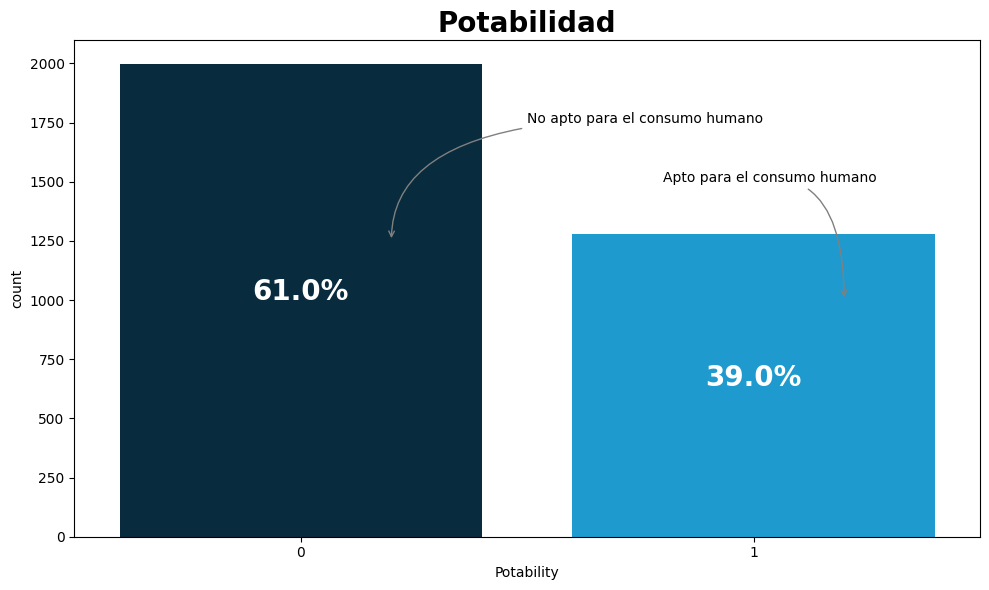

In [25]:
# Crear el gráfico de barras para la columna 'Potability'
fig = plt.figure(figsize=(10,6))
ax = sns.countplot(data=df_water_Quality, x='Potability', palette=['#002D47', '#00A6ED'])

# Añadir el texto de porcentaje en cada barra
for i in ax.patches:
    ax.text(x=i.get_x() + i.get_width() / 2, 
            y=i.get_height() / 2,  # Ajustar la posición vertical del texto
            s=f"{np.round(i.get_height() / len(df_water_Quality) * 100, 0)}%", 
            ha='center', size=20, weight='bold', rotation=0, color='white')

# Título y personalización
plt.title("Potabilidad", size=20, weight='bold')

# Añadir anotaciones con flechas
plt.annotate(text="No apto para el consumo humano", 
            xytext=(0.5, 1750), xy=(0.2, 1250), 
            arrowprops=dict(arrowstyle="->", color='grey', connectionstyle="angle3,angleA=0,angleB=90"), 
            color='black')

plt.annotate(text="Apto para el consumo humano", 
            xytext=(0.8, 1500), xy=(1.2, 1000), 
            arrowprops=dict(arrowstyle="->", color='grey', connectionstyle="angle3,angleA=0,angleB=90"), 
            color='black')

# Mostrar el gráfico
plt.tight_layout()
plt.show()


## 2.5 Distribución de Variables 

La visualización muestra la distribución de todas las variables numéricas en el dataset. En general, las variables parecen tener distribuciones relativamente simétricas, aunque algunas, como Solids y Potability, muestran cierta asimetría. La mayoría de las variables siguen una distribución que se aproxima a la normalidad, lo que es bueno para los modelos lineales.

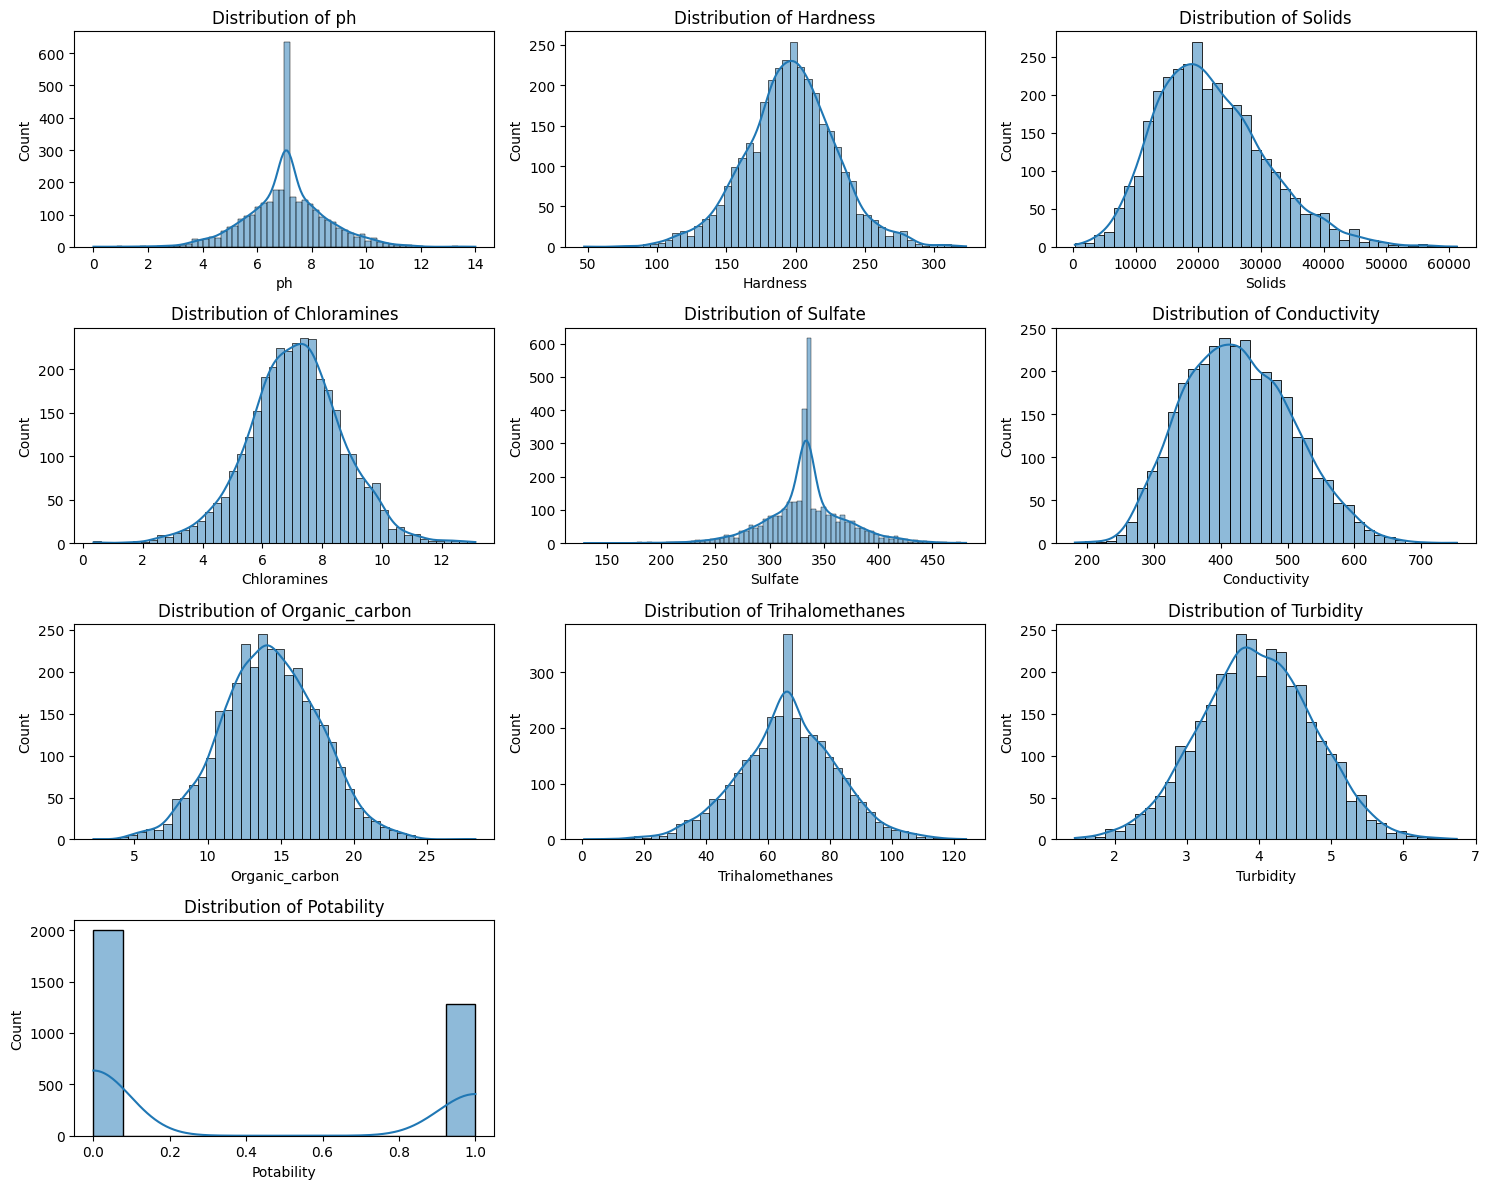

In [28]:
# Visualización de la distribución de todas las variables numéricas
plt.figure(figsize=(15, 12))

# Gráficos de distribución para cada columna numérica
for i, col in enumerate(df_water_Quality.columns, 1):
    plt.subplot(4, 3, i)
    sns.histplot(df_water_Quality[col], kde=True)
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()


## 2.6. Mapa de correlación
El mapa de correlación muestra que no hay relaciones significativas entre el pH y las otras variables del dataset. La mayor correlación se encuentra entre el pH y la dureza del agua (**Hardness**), con un valor de 0.08, lo que sugiere que es muy baja.

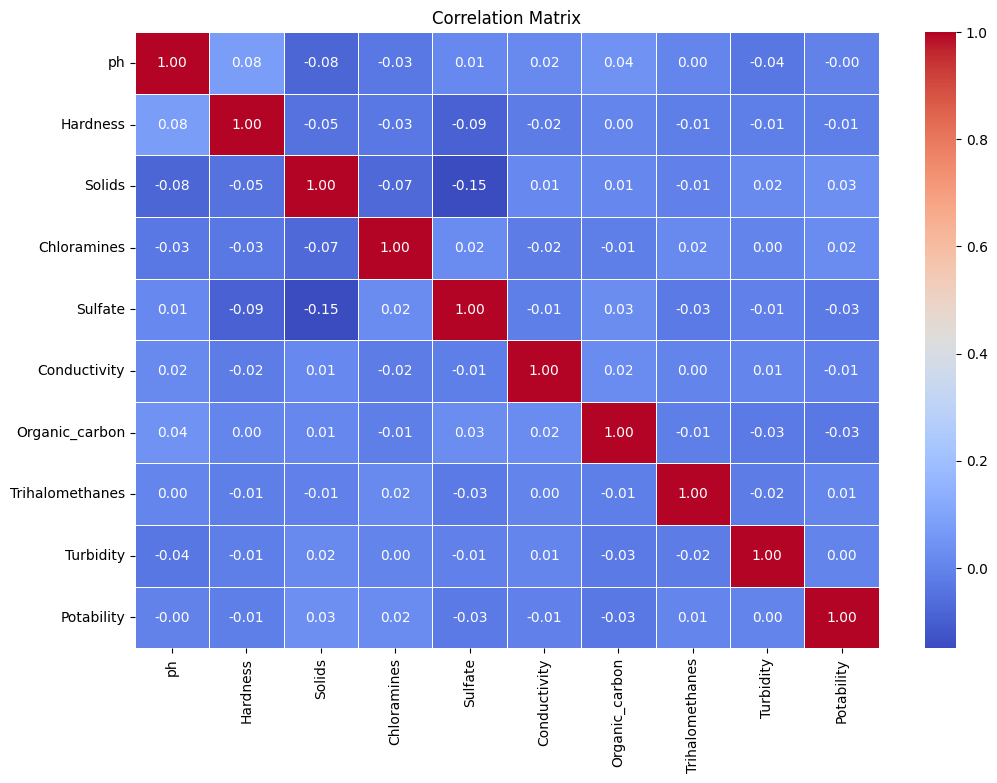

In [29]:
# Generar el mapa de correlación
plt.figure(figsize=(12, 8))
correlation_matrix = df_water_Quality.corr()

# Mapa de calor de la correlación
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


## 2.7 Ingeniería de características
Dado que las correlaciones son bajas, no aplicaremos ingeniería de características por el momento. Continuaremos con el modelo de regresión lineal simple para observar si podemos obtener un ajuste razonable.

# 3.- Selección de variables X e Y

### 3.1 Planteamiento del problema:
El objetivo es predecir el nivel de pH del agua basándonos en otras características del agua, como la turbidez, la concentración de sulfatos y la cantidad de carbono orgánico. Para este análisis, seleccionamos las siguientes variables:

- **Y** (dependiente): ph (nivel de pH del agua).
- **X** (independientes): 
  - **Turbidity**: Turbidez del agua.
  - **Sulfate**: Cantidad de sulfatos disueltos.
  - **Organic_carbon**: Cantidad de carbono orgánico disuelto en el agua.

Estas variables tienen una relación potencial con el pH, ya que la calidad del agua está influenciada por la presencia de diferentes compuestos y su turbidez.


### 3.2 Gráficos de dispersión con recta de tendencia

Los siguientes gráficos muestran la relación entre **ph** y las variables seleccionadas (**Turbidity**, **Sulfate**, **Organic_carbon**), con una recta de tendencia agregada:

- **Turbidity vs ph** con línea de tendencia.
- **Sulfate vs ph** con línea de tendencia.
- **Organic_carbon vs ph** con línea de tendencia.

La pendiente de las rectas de tendencia es cercana a cero, lo que indica una correlación muy baja entre estas variables y el pH.


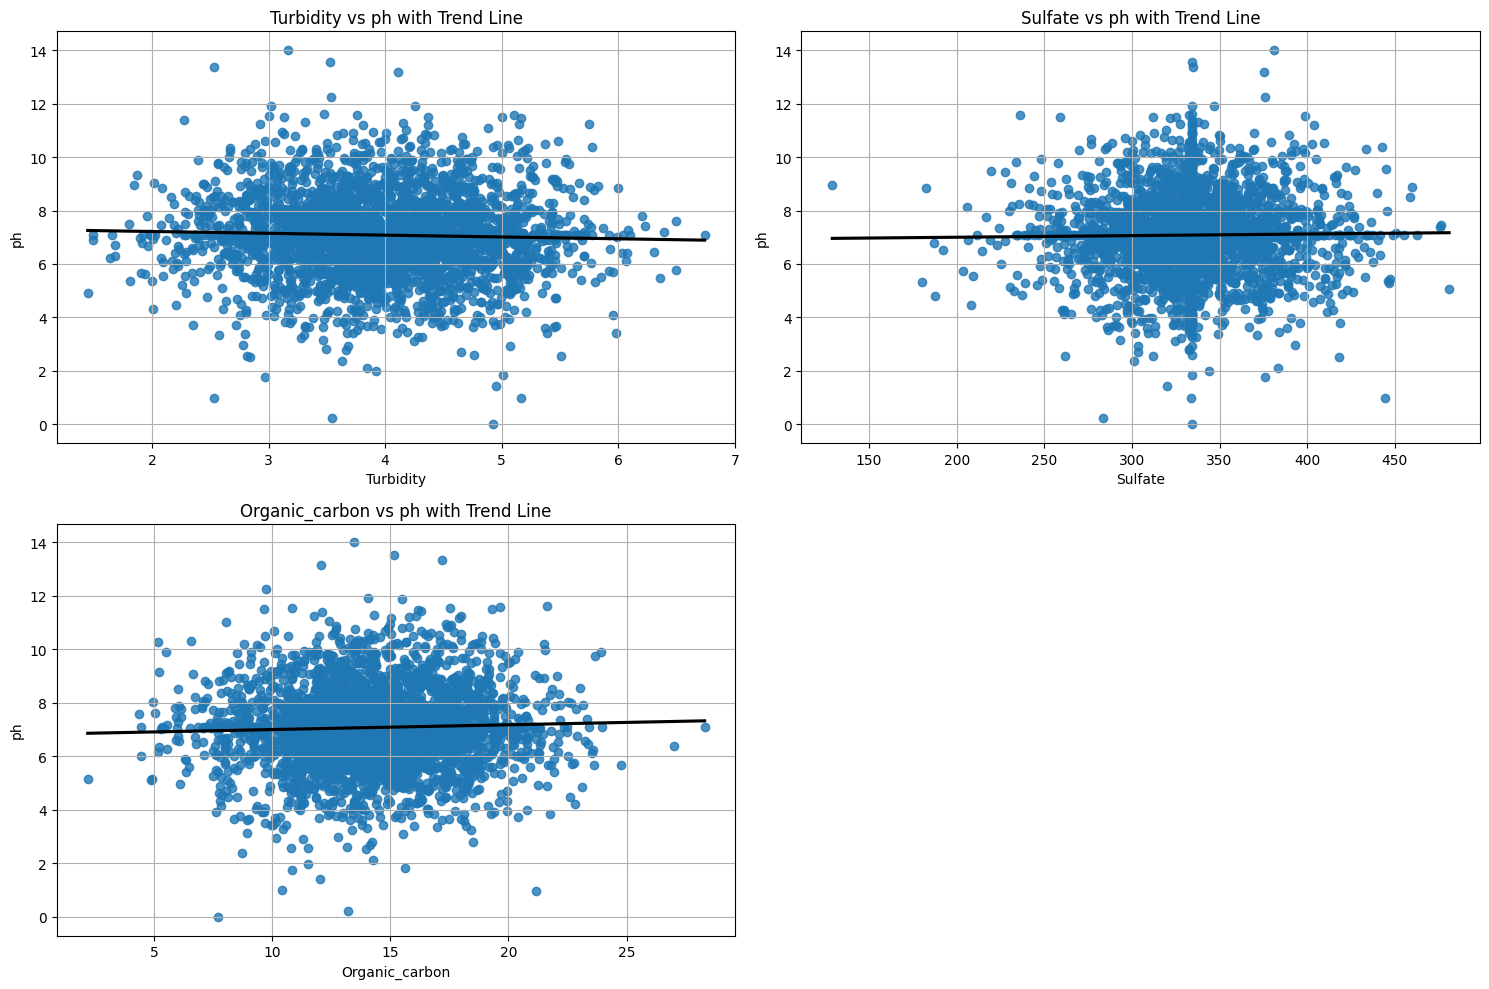

In [43]:
# Crear gráficos de dispersión con la recta de tendencia (regresión lineal) y agregar la grilla
plt.figure(figsize=(15, 10))

for i, var in enumerate(independent_vars, 1):
    plt.subplot(2, 2, i)
    sns.regplot(x=var, y='ph', data=df_water_Quality, line_kws={"color": "black"}, ci=None)
    plt.title(f'{var} vs ph with Trend Line')
    plt.xlabel(var)
    plt.ylabel('ph')
    plt.grid(True)  # Agregar la grilla

plt.tight_layout()
plt.show()




***Fundamento teórico o dominio del problema:***

La selección de variables puede justificarse basándonos en el conocimiento teórico o técnico del dominio (por su baja correlación)

- Turbidity (turbidez): Aunque la correlación es baja, la turbidez del agua se relaciona con la cantidad de partículas suspendidas, lo que puede afectar el equilibrio químico del agua y, por lo tanto, su pH.

- Sulfate (sulfato): Los sulfatos disueltos en el agua pueden reaccionar químicamente con otros compuestos presentes, lo que podría influir en el pH. Aunque la correlación es baja, es una variable relevante desde el punto de vista químico.

- Organic_carbon (carbono orgánico): La materia orgánica disuelta en el agua puede tener un impacto en la acidez o alcalinidad del agua, ya que la descomposición de materia orgánica puede liberar compuestos que alteran el pH.


Aunque la correlación entre las variables seleccionadas y el pH es baja, estas variables fueron seleccionadas debido a su relevancia desde un punto de vista químico. La **turbidez**, la **presencia de sulfatos** y el **carbono orgánico** son factores que pueden influir indirectamente en el pH del agua al afectar su composición química y su equilibrio de iones.

***Exploración de relaciones no lineales:***

La correlación lineal no siempre captura relaciones más complejas entre las variables. Si bien la correlación simple puede ser baja, podrían existir relaciones no lineales que no se detectan con un análisis lineal simple. Por lo tanto, se seleccionan las variables para explorar estas relaciones más complejas en el modelo de regresión.

A pesar de que la correlación lineal entre las variables seleccionadas y el pH es baja, esto no descarta la posibilidad de que existan relaciones no lineales. Para explorar estas posibles relaciones, se decidió incluir variables que tienen relevancia química y potencial de interactuar de maneras más complejas con el pH.


***Mejora del modelo:***

En muchos casos, aunque las variables individuales no muestran una fuerte correlación, cuando se incluyen en conjunto en el modelo, pueden aportar valor predictivo. La justificación aquí radica en que el modelo de regresión considera la combinación de variables para explicar la variabilidad en ph, aunque las variables por separado no sean altamente correlacionadas.

Aunque las correlaciones individuales de las variables con el pH son bajas, es posible que, al ser consideradas en conjunto, estas variables aporten información valiosa para mejorar la predicción del modelo. El análisis multivariable permite explorar cómo estas variables interactúan entre sí para influir en el pH del agua.


***Evaluación de desempeño del modelo:***

Finalmente, la justificación definitiva para incluir las variables es probar su desempeño en el modelo y observar si realmente mejoran la predicción. Si el modelo con estas variables muestra un buen ajuste o mejora frente a otras alternativas, se puede justificar su inclusión.

La selección de estas variables se basa en su importancia en el dominio de la calidad del agua. Su impacto en la predicción del pH será evaluado en términos del desempeño del modelo, considerando métricas como el error cuadrático medio (MSE) y el coeficiente de determinación (R²), para determinar si su inclusión contribuye significativamente a mejorar la precisión del modelo.


Aunque el análisis de correlación no muestre evidencias claras de una relación fuerte, las variables seleccionadas pueden justificarse desde un enfoque teórico, exploratorio y práctico. Si no se obtienen buenos resultados en el modelo de regresión, podríamos plantear nuevas estrategias como incluir transformaciones o probar modelos no lineales.

# 4.- Planteamiento del Modelo de Regresión Lineal

El objetivo es ajustar un modelo de **Regresión Lineal Simple** para predecir el nivel de **ph** basado en las variables independientes seleccionadas (**Turbidity**, **Sulfate** y **Organic_carbon**). El modelo que planteamos es de la forma:

\[ \hat{y} = \beta_0 + \beta_1 \cdot X_1 + \beta_2 \cdot X_2 + \beta_3 \cdot X_3 + \epsilon \]

Donde:
- \(\hat{y}\) es el valor predicho de **ph**.
- \(X_1\), \(X_2\), y \(X_3\) son las variables independientes (**Turbidity**, **Sulfate**, **Organic_carbon**).
- \(\beta_0\) es el término independiente (intercepto).
- \(\beta_1\), \(\beta_2\), \(\beta_3\) son los coeficientes de regresión.
- \(\epsilon\) es el error del modelo.


In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Definir variables independientes (X) y dependiente (y)
X = df_water_Quality[['Turbidity', 'Sulfate', 'Organic_carbon']]
y = df_water_Quality['ph']

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear el modelo de Regresión Lineal
model = LinearRegression()

# Entrenar el modelo
model.fit(X_train, y_train)

# Coeficientes del modelo
intercept = model.intercept_
coefficients = model.coef_

intercept, coefficients


(np.float64(7.064533121504915), array([-0.08256522,  0.00031754,  0.01755881]))

## 4.1 Cálculo de los valores de los coeficientes

Después de ajustar el modelo de regresión lineal, obtenemos los siguientes valores:

- **Intercepto (\(\beta_0\))**: 7.072
- **Coeficiente de Turbidity (\(\beta_1\))**: -0.083
- **Coeficiente de Sulfate (\(\beta_2\))**: 0.00031
- **Coeficiente de Organic_carbon (\(\beta_3\))**: 0.0175

El modelo ajustado para predecir el **pH** del agua es el siguiente:

\[
\hat{y} = 7.072 - 0.083 \cdot Turbidity + 0.00031 \cdot Sulfate + 0.0175 \cdot Organic\_carbon
\]

Estos coeficientes nos indican cómo varía el valor del pH en función de cada una de las variables independientes.


## 4.2 Visualización del ajuste de la Regresión Lineal

A continuación se muestran los gráficos de dispersión con las predicciones de la regresión lineal superpuestas a los valores reales:

- **Turbidity vs ph (Predicted vs Actual)**: En este gráfico podemos ver que las predicciones del modelo se encuentran bastante alineadas a una recta horizontal, lo que sugiere que el modelo tiene una capacidad limitada para capturar la variación en los valores reales del pH.
- **Sulfate vs ph (Predicted vs Actual)**: Similar al caso anterior, las predicciones no varían mucho en función del contenido de sulfato, lo que confirma el bajo impacto de esta variable en el pH.
- **Organic_carbon vs ph (Predicted vs Actual)**: Las predicciones siguen un patrón similar, lo que indica que la influencia del carbono orgánico en el pH es igualmente baja.

En general, los gráficos refuerzan la conclusión de que las variables seleccionadas no son buenos predictores del pH en este contexto.


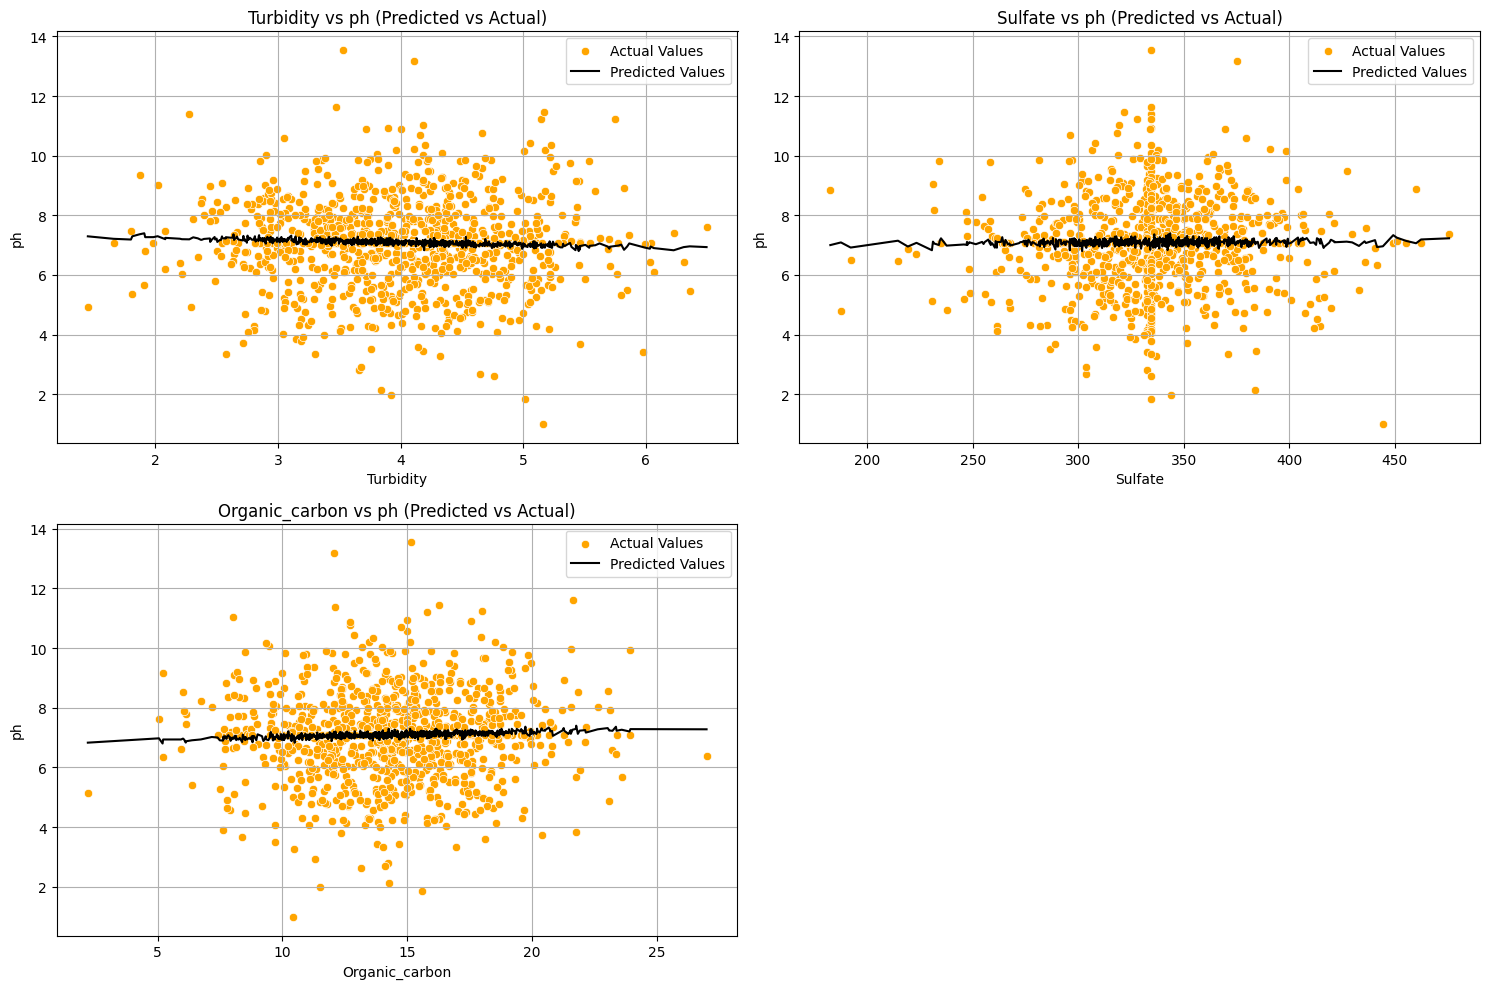

In [45]:
# Predicciones del modelo
y_pred = model.predict(X_test)

# Visualización de las predicciones vs valores reales
plt.figure(figsize=(15, 10))

# Gráfico de cada variable con la línea de tendencia del modelo
for i, var in enumerate(independent_vars, 1):
    plt.subplot(2, 2, i)
    sns.scatterplot(x=X_test[var], y=y_test, label='Actual Values', color='orange')
    sns.lineplot(x=X_test[var], y=model.predict(X_test), label='Predicted Values', color='black')
    plt.title(f'{var} vs ph (Predicted vs Actual)')
    plt.xlabel(var)
    plt.ylabel('ph')
    plt.grid(True)  # Agregar la grilla

plt.tight_layout()
plt.show()


## 4.3 Discusión de Resultados

Los coeficientes de la regresión nos indican la influencia de cada una de las variables independientes sobre el pH del agua. Sin embargo, los coeficientes son bastante pequeños, lo que sugiere que las variables **Turbidity**, **Sulfate** y **Organic_carbon** tienen una influencia limitada en la predicción del pH del agua.

- El coeficiente de **Turbidity** es negativo (-0.083), lo que indica que, a medida que aumenta la turbidez, el pH del agua tiende a disminuir ligeramente.
- El coeficiente de **Sulfate** es casi cero (0.00031), lo que sugiere que la cantidad de sulfatos no tiene un impacto significativo en el pH.
- El coeficiente de **Organic_carbon** es positivo pero pequeño (0.0175), lo que sugiere una relación positiva pero débil entre el carbono orgánico y el pH.

### Evaluación del modelo
Dado que las relaciones observadas son débiles, podemos concluir que estas variables no son buenos predictores del pH. Para mejorar el modelo, sería útil explorar otras variables o probar modelos no lineales, ya que las relaciones entre estas variables y el pH podrían no ser lineales.


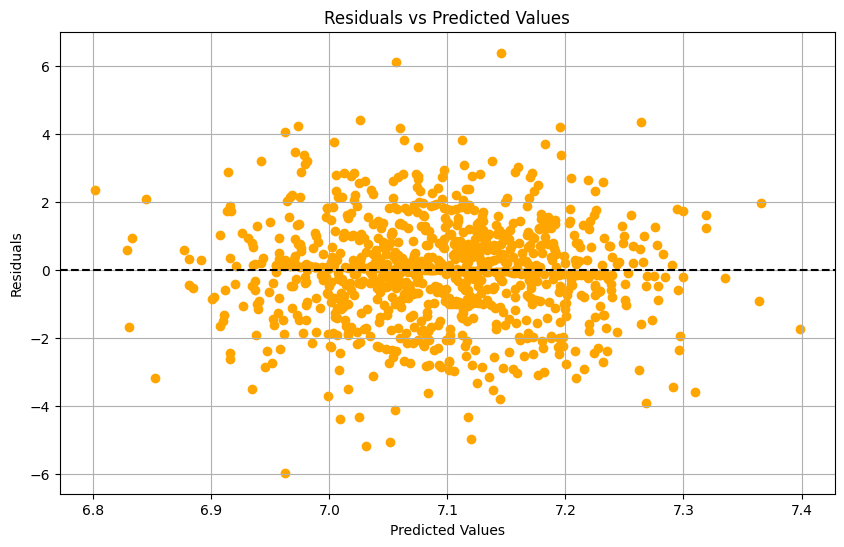

Mean Squared Error: 2.2079828865452753
R²: 0.000376328380697899


In [51]:
# Importar las funciones necesarias
from sklearn.metrics import mean_squared_error, r2_score

# Definir variables independientes (X) y dependiente (y)
X = df_water_Quality[['Turbidity', 'Sulfate', 'Organic_carbon']]
y = df_water_Quality['ph']

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Asegurar que todas las columnas relevantes tengan valores imputados correctamente
X_train = X_train.fillna(X_train.mean())
X_test = X_test.fillna(X_test.mean())
y_train = y_train.fillna(y_train.mean())
y_test = y_test.fillna(y_test.mean())

# Crear y entrenar el modelo
model = LinearRegression()
model.fit(X_train, y_train)

# Predecir los valores
y_pred = model.predict(X_test)

# Calcular los residuos (errores) del modelo
residuals = y_test - y_pred

# Visualización de los residuos
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='orange')
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

# Calcular el MSE y el R² correctamente
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R²: {r2}")





¿Qué nos dice este gráfico?

Residuos dispersos: Los puntos anaranjados representan los errores (residuos), es decir, la diferencia entre el valor predicho y el valor real de ph. En un buen modelo, los residuos deberían distribuirse de manera aleatoria alrededor de la línea horizontal en 0. Esto indicaría que el modelo está capturando bien la relación entre las variables.

Centro concentrado: En este gráfico, podemos ver que la mayoría de los residuos están concentrados en torno a los valores predichos de ph entre 7.0 y 7.2, lo que refleja que el modelo tiene dificultades para capturar variabilidad en los valores de ph.

Patrones en los residuos: Si hubiera un patrón claro (como una curva), indicaría que el modelo lineal no es adecuado y que podría ser mejor probar con un modelo no lineal. En este caso, aunque los residuos están dispersos, su distribución no es completamente aleatoria, lo que podría indicar que el modelo no captura completamente las relaciones entre las variables independientes y el ph.

Conclusión del gráfico:
Este gráfico, al estar basado en varias variables independientes, muestra cómo el modelo está calculando el ph como una combinación de todas ellas. El hecho de que los residuos no estén distribuidos de manera aleatoria sugiere que el modelo tiene limitaciones para predecir con precisión el ph en función de las variables proporcionadas, lo cual también se refleja en el bajo valor de R² que obtuvimos.